In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from itertools import combinations,permutations
from tqdm import tqdm

read doc

In [415]:
data = pd.read_excel('Case Study Data.xlsx',header=2, index_col=1)

#inverse order, I sort it to time series ascending order
data = data.drop('Unnamed: 0',axis = 1)[::-1]
data.head(10)

,CMCSA 2.8 01/15/51,ORCL 3.95 03/25/51,AMGN 5.65 03/02/53,AMGN 4 7/8 03/01/53,INTC 5.7 02/10/53,INTC 4.9 08/05/52,CVS 5.05 03/25/48,BA 5.805 05/01/50,WBD 5.141 03/15/52
Date,,,,,,,,,
2020-05-21,146.165312,NaN,NaN,NaN,NaN,NaN,208.278052,414.902551,NaN
2020-05-22,148.927042,NaN,NaN,NaN,NaN,NaN,208.644474,406.113647,NaN
2020-05-26,143.603657,NaN,NaN,NaN,NaN,NaN,203.465456,375.925060,NaN
2020-05-27,146.297383,NaN,NaN,NaN,NaN,NaN,205.209707,373.691010,NaN
2020-05-28,145.460576,NaN,NaN,NaN,NaN,NaN,204.168480,356.480676,NaN
2020-05-29,148.448952,NaN,NaN,NaN,NaN,NaN,205.452304,355.568037,NaN
2020-06-01,143.404932,NaN,NaN,NaN,NaN,NaN,204.395982,340.332715,NaN
2020-06-02,140.563942,NaN,NaN,NaN,NaN,NaN,198.706160,324.918031,NaN
2020-06-03,135.891138,NaN,NaN,NaN,NaN,NaN,196.106112,319.925167,NaN


# visualize bond spread

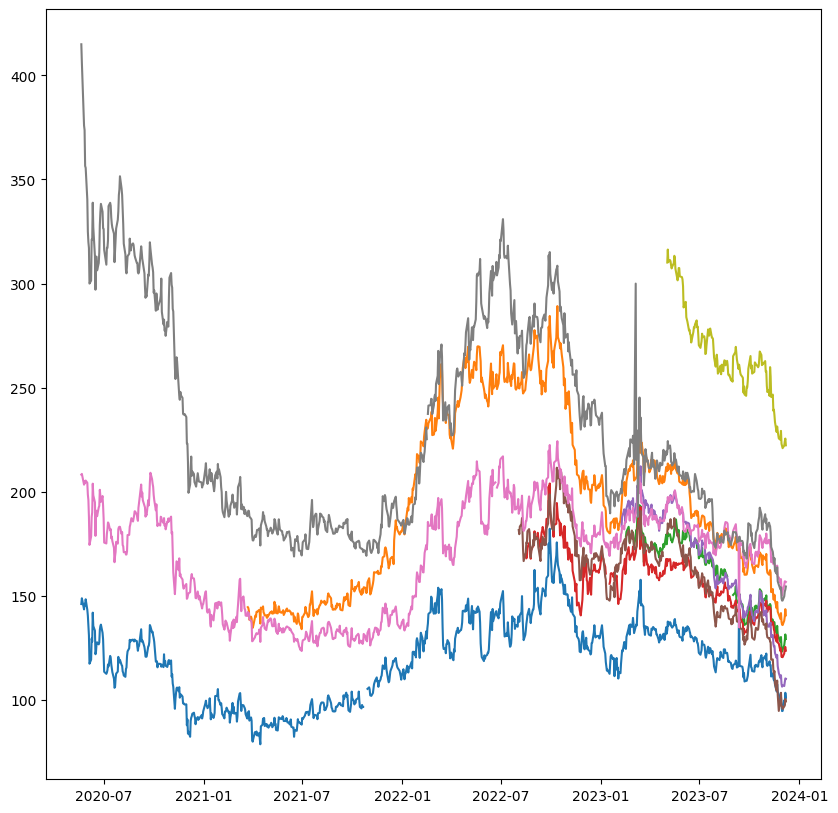

In [416]:
plt.figure(figsize=(10,10))
plt.plot(data)
plt.show()

## Visualize the pattern - Moving Average Normalization

Since the data is noise, I would like to firlter the trend with moving Average normalization method. Then we can try to see if there is a trend. In the test, I consider the window size with 7,14, and 21.

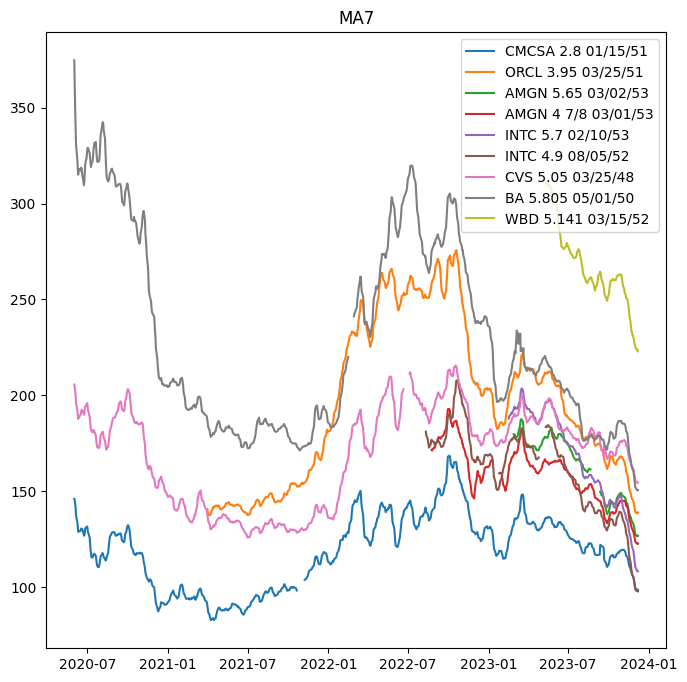

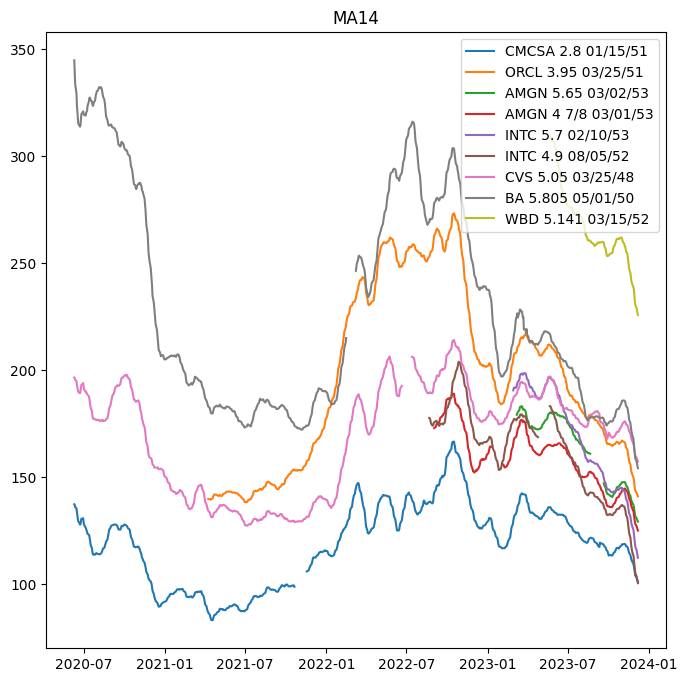

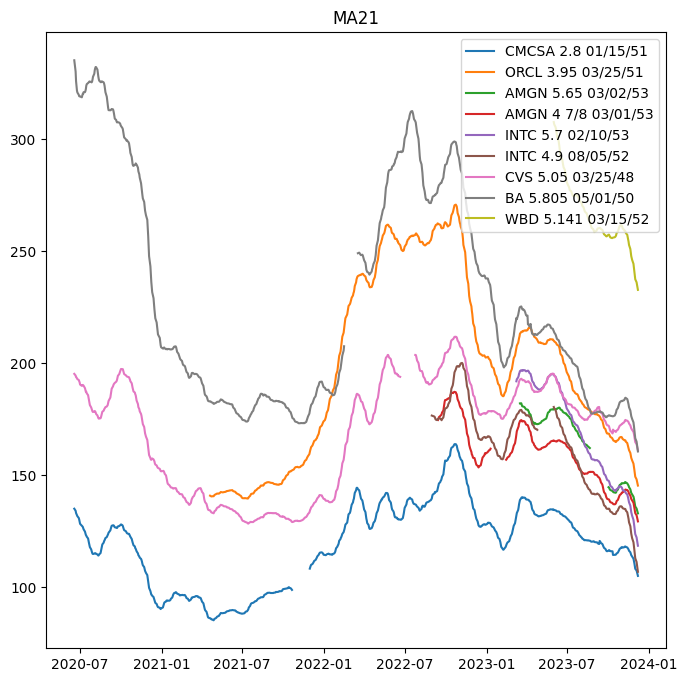

In [417]:
window_sizes = [7, 14, 21]

ma_dic = {}

# Calculate moving averages for each window size for each column
for window_size in window_sizes:
# Create new column names based on window size
    df = pd.DataFrame()
    for col in data.columns:

        # Calculate moving average
        ma_col = data[col].rolling(window=window_size).mean()

        # Add moving average to the DataFrame
        df[col] = ma_col

    #save dataframe into dictionary
    ma_dic[window_size] = df

    # Display the DataFrame with moving averages
    plt.figure(figsize=(8,8))
    plt.plot(df,label = df.columns)
    plt.title(f"MA{window_size}")
    plt.legend(loc = 'best')
    plt.show()

# Data Processing


## data quality analysis

In data quality analysis, I check the distribution, missing value, missing value type and daily return significance.

In [418]:
data.describe()

,CMCSA 2.8 01/15/51,ORCL 3.95 03/25/51,AMGN 5.65 03/02/53,AMGN 4 7/8 03/01/53,INTC 5.7 02/10/53,INTC 4.9 08/05/52,CVS 5.05 03/25/48,BA 5.805 05/01/50,WBD 5.141 03/15/52
count,884.000000,681.000000,196.000000,326.000000,210.000000,333.000000,887.000000,888.000000,151.000000
mean,119.007814,195.702751,162.848709,159.039201,167.419047,161.397757,169.331484,228.548833,266.400296
std,19.514186,42.321266,17.110562,15.491931,25.571684,23.449580,25.715661,51.908468,22.216411
min,78.838568,134.103094,123.354981,120.643042,106.490723,94.844947,123.633913,147.810676,221.000000
25%,101.132041,154.118634,146.734729,148.481114,147.745452,142.651648,142.000555,184.313327,256.128788
50%,120.263836,190.816042,168.328511,160.871248,170.891229,167.613366,175.931514,209.474673,262.916632
75%,133.111015,230.408345,176.683232,168.153850,190.520155,176.969895,188.619070,275.467907,277.151604
max,182.308331,289.208881,193.638378,204.038986,212.297155,211.633432,224.343884,414.902551,316.346180


from the count number, we can see there are many nan value. Then take a look at the nan value frequency, to determine the missing value is caused by different start date or update frequency

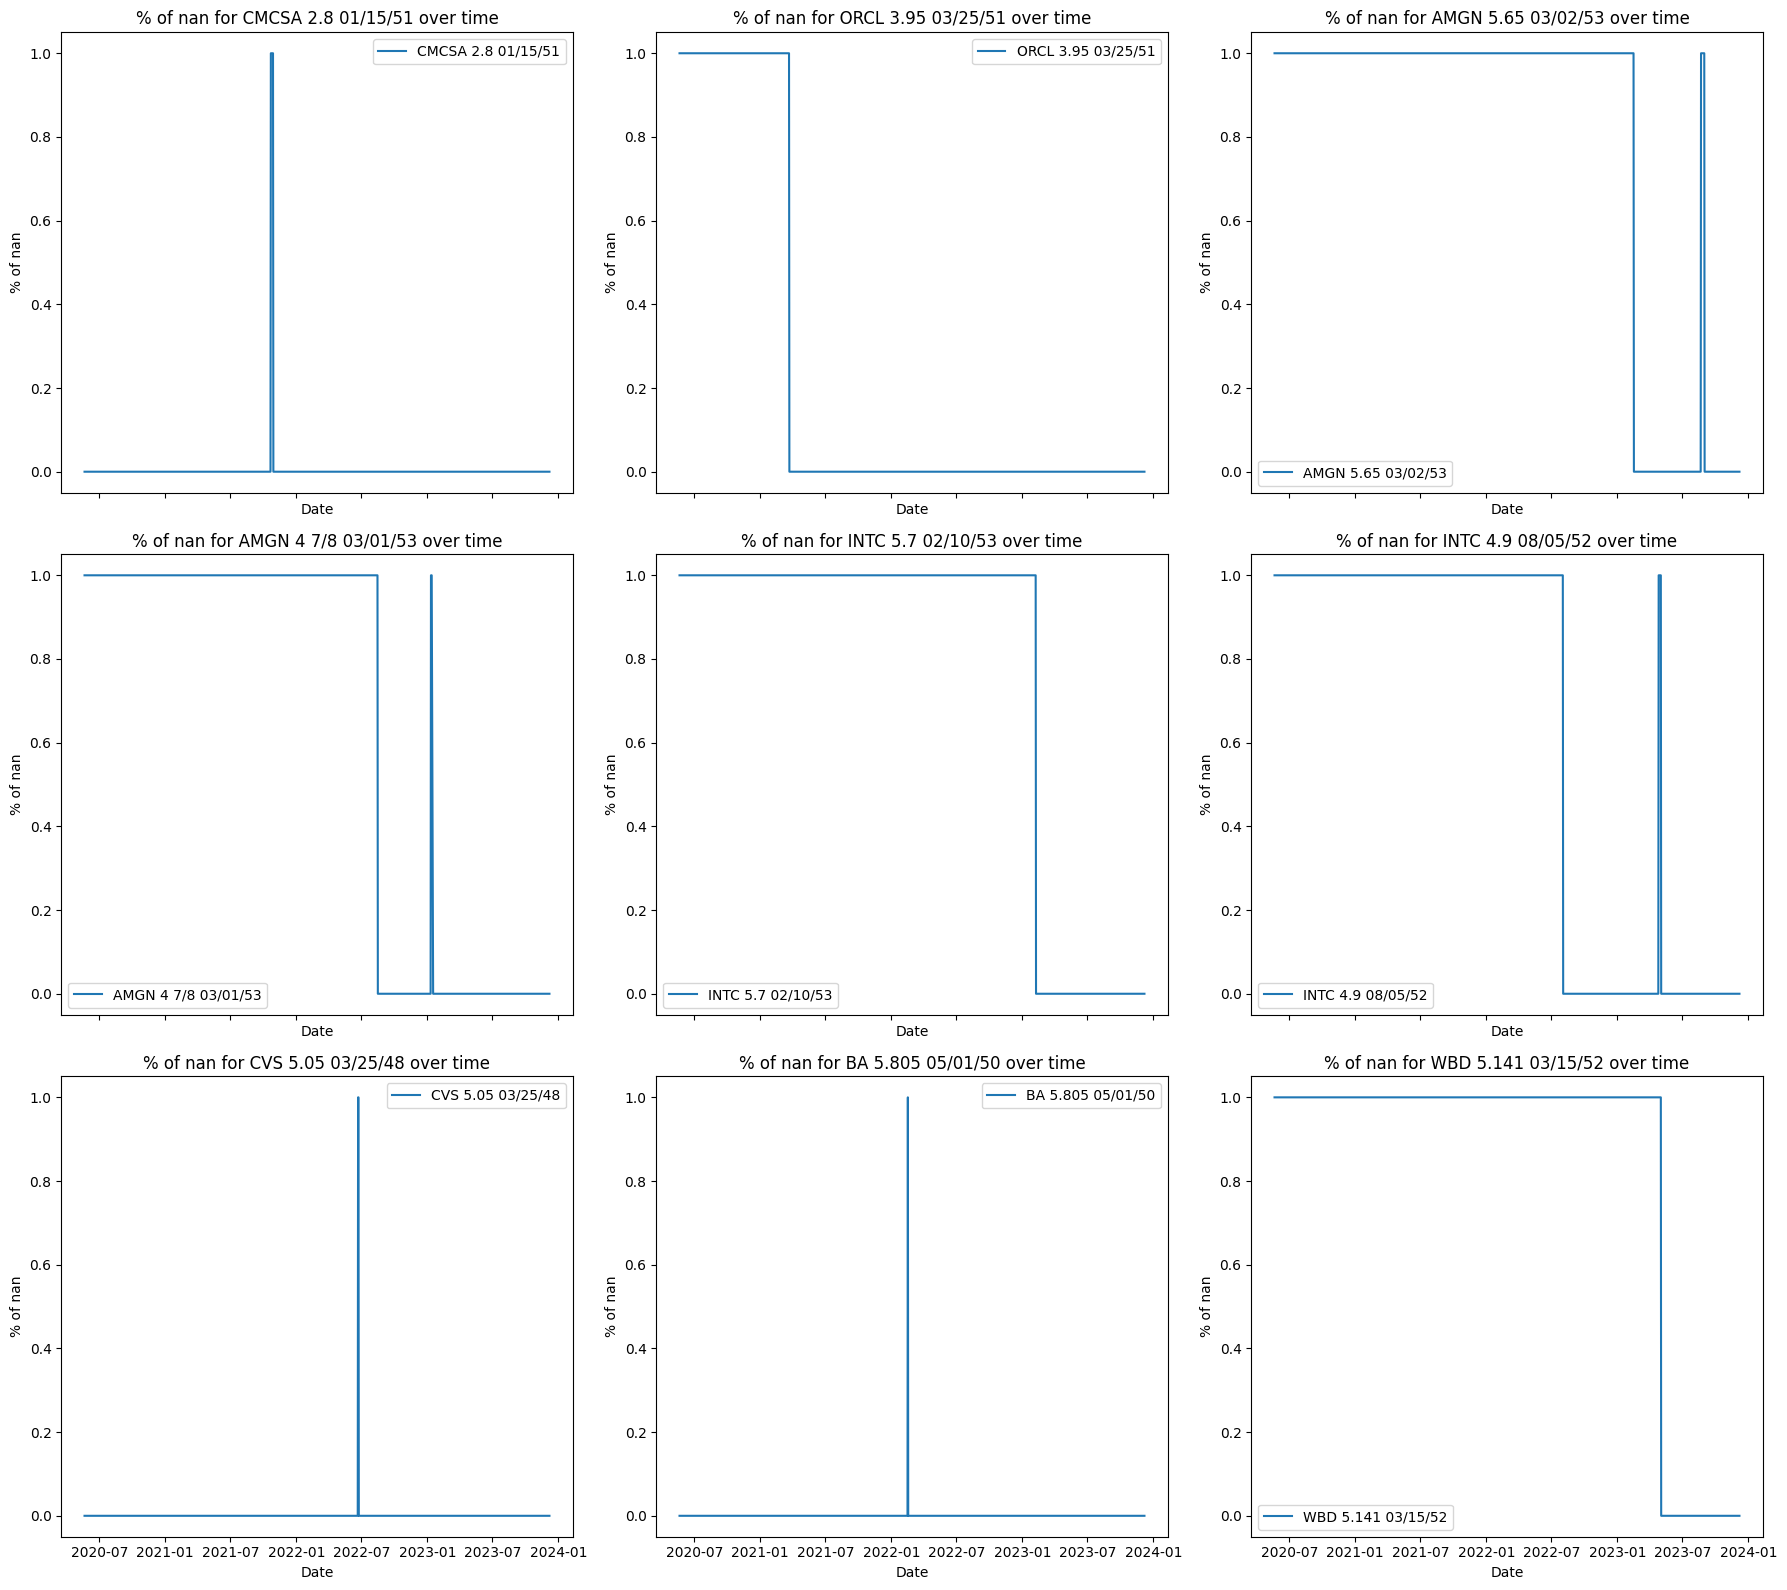

In [419]:
nan_pct_overtime = data.isna().groupby(data.index).mean()

fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18,16),sharex = True)
axes = axes.ravel()

for i,feature in enumerate(data.columns):
    axes[i].plot(nan_pct_overtime.index,nan_pct_overtime[feature],label = feature)
    axes[i].set_title(f'% of nan for {feature} over time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('% of nan')
    axes[i].legend()

plt.tight_layout()
plt.show()


From the plot, we can see the missing value is caused by different start date. Summarize the start and end date for each bond

In [420]:
# Initialize lists to store start and end indices
start_indices = []
end_indices = []

# Iterate through columns
for col in data.columns:
    # Find first and last non-NaN indices
    first_non_nan = data[col].first_valid_index()
    last_non_nan = data[col].last_valid_index()
    
    # Append to respective lists
    start_indices.append(first_non_nan)
    end_indices.append(last_non_nan)

# Create a new DataFrame to summarize the information
summary_df = pd.DataFrame({'Start Index': start_indices, 'End Index': end_indices}, index=df.columns)

print(summary_df)

                    Start Index  End Index
CMCSA 2.8 01/15/51   2020-05-21 2023-12-07
ORCL 3.95 03/25/51   2021-03-23 2023-12-07
AMGN 5.65 03/02/53   2023-02-16 2023-12-07
AMGN 4 7/8 03/01/53  2022-08-16 2023-12-07
INTC 5.7 02/10/53    2023-02-08 2023-12-07
INTC 4.9 08/05/52    2022-08-03 2023-12-07
CVS 5.05 03/25/48    2020-05-21 2023-12-07
BA 5.805 05/01/50    2020-05-21 2023-12-07
WBD 5.141 03/15/52   2023-05-03 2023-12-07


check if there is abnormal daily return.

/var/folders/9k/3t7xfs3d5nd30hq7p7gdpdkc0000gn/T/ipykernel_12141/3234108472.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_pct = data.pct_change()


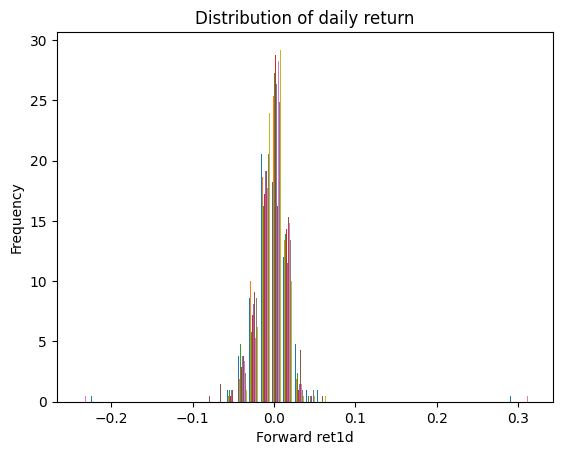

In [425]:
daily_pct = data.pct_change()
plt.hist(daily_pct.dropna(),bins = 40,density = True)
plt.title('Distribution of daily return')
plt.xlabel('Forward ret1d')
plt.ylabel('Frequency')
plt.show()

Since the outlier in daily return is caused by gap in price, we believe the forward ret1d quality is acceptable

Since the bond spread has different initial size, I will first normalize all bond by dividing by their initial price

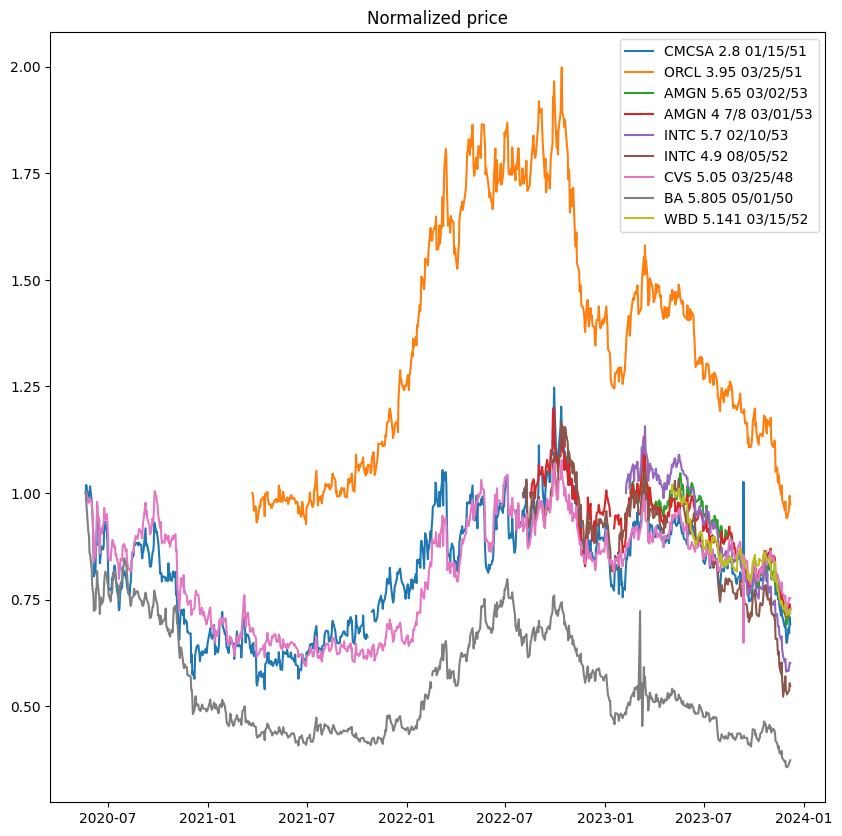

In [426]:

norm_df = pd.DataFrame(data)
for col in df.columns:
    first_non_nan = norm_df[col].first_valid_index()
    if first_non_nan is not None:
        norm_df[col] = norm_df[col] / norm_df[col][first_non_nan]

plt.figure(figsize=(10,10))
plt.plot(norm_df,label = df.columns)
plt.title(f"Normalized price")
plt.legend(loc = 'best')
plt.show()

# pair trading

In this part, I would like to explore the correlation over time between the target bond and other bond. I will set the target bond as "CMCSA 2.8 01/15/51" in the example.

In [427]:
tickers = data.columns
tickers_df = data

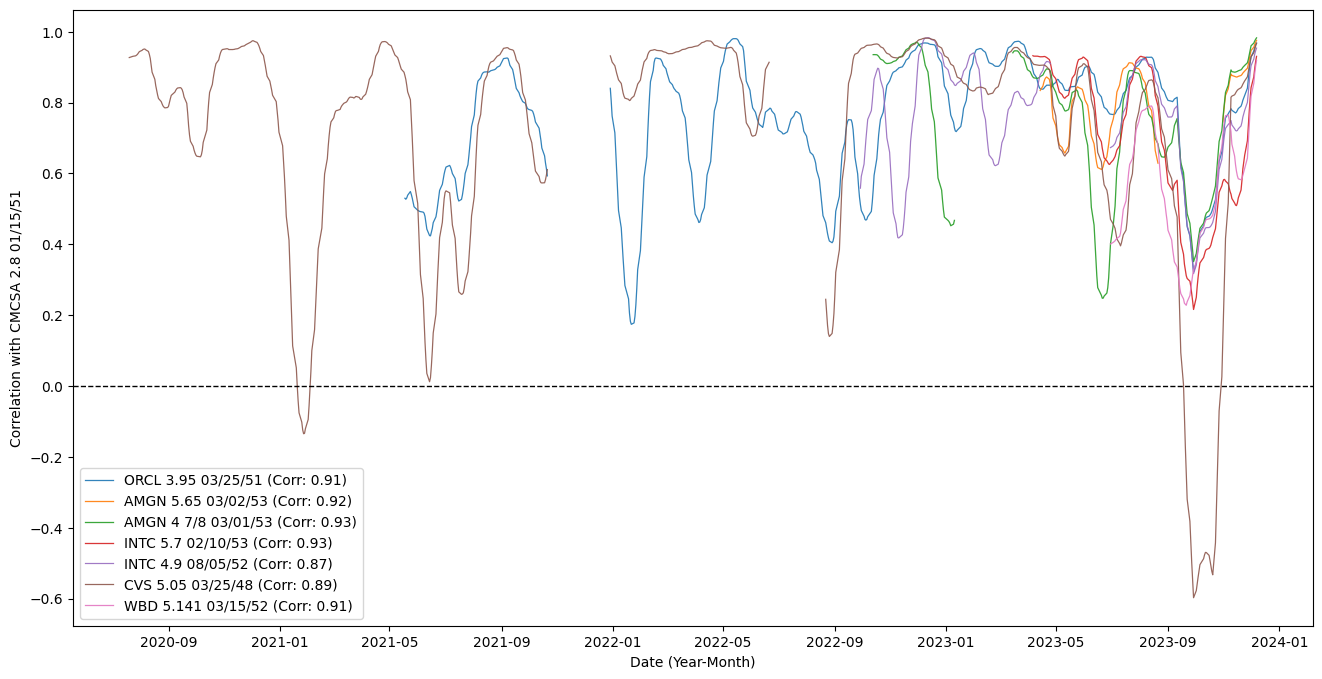

In [428]:
TARGET = "CMCSA 2.8 01/15/51"
MA_WINDOW = 14
ARB_WINDOW = MA_WINDOW * 2
plt.figure(figsize=(16, 8))

corr_ticks = []
LEADS = []

for ticker in tickers:
    if ticker == TARGET:
        continue
    correlation = tickers_df[ticker].corr(tickers_df[TARGET])
    if abs(correlation) < 0.75:
        continue

    LEADS.append(ticker)

    corr_ts = tickers_df[ticker].rolling(ARB_WINDOW).corr(tickers_df[TARGET])
    plt.plot(
        tickers_df.index,
        corr_ts.rolling(MA_WINDOW).mean(),
        label=f"{ticker} (Corr: {correlation:.2f})",
        alpha=correlation,
        linewidth=correlation,
    )
    corr_ticks.append(ticker)

plt.axhline(y=0, color="k", linestyle="--", linewidth=1)


plt.xlabel("Date (Year-Month)")
plt.ylabel("Correlation with CMCSA 2.8 01/15/51")
plt.legend()
plt.show()

From the cross time change of correlation, we can see the correlation in pairs is high. In future trading, we could monitor the change of z-score and correspondingly to pair trading. Next, I would like to explore the tradble pairs.

# Approach 1: Cointegration test and spread calculation

Cointegration is a statistical property of time series:

    Correlation specify the co-movement of return, it is a short-term relationship

    Cointegration specify co-movement of price, it is a long-term relationship

We use Augmented Dickey-Fuller test to test cointegration.

## 1. Estimate spread

In [429]:
from sklearn import linear_model

def reg(x,y):
    regression_data = pd.DataFrame({'x': x,'y': y}).dropna()
    index = regression_data.index
    x = regression_data['x'].values.reshape(-1,1)
    y = regression_data['y'].values
    regr = linear_model.LinearRegression()
    regr.fit(x, y)    
    beta = regr.coef_[0]
    alpha = regr.intercept_
    spread = y - regr.predict(x)
    return index,spread

## 2. ADF test
we need to check the first order difference $spread_t = log(y_t) - \beta log(x_t) - \alpha$ is stationary and mean reverting. We use the ADF test to check the stationarity of the spread series.

The significance of stationary test should fulfill two points:
    1. ADF test statistics should be less than 1% level
    2. p value should smaller than 0.05

I also print out the spread between the pair

('CMCSA 2.8 01/15/51', 'AMGN 5.65 03/02/53')
('CMCSA 2.8 01/15/51', 'AMGN 4 7/8 03/01/53')
('CMCSA 2.8 01/15/51', 'INTC 5.7 02/10/53')
('CMCSA 2.8 01/15/51', 'CVS 5.05 03/25/48')
('CMCSA 2.8 01/15/51', 'WBD 5.141 03/15/52')
('ORCL 3.95 03/25/51', 'CMCSA 2.8 01/15/51')
('ORCL 3.95 03/25/51', 'INTC 5.7 02/10/53')
('AMGN 5.65 03/02/53', 'CMCSA 2.8 01/15/51')
('AMGN 5.65 03/02/53', 'CVS 5.05 03/25/48')
('AMGN 5.65 03/02/53', 'BA 5.805 05/01/50')
('AMGN 4 7/8 03/01/53', 'CMCSA 2.8 01/15/51')
('AMGN 4 7/8 03/01/53', 'CVS 5.05 03/25/48')
('INTC 5.7 02/10/53', 'CMCSA 2.8 01/15/51')
('INTC 5.7 02/10/53', 'ORCL 3.95 03/25/51')
('INTC 5.7 02/10/53', 'INTC 4.9 08/05/52')
('INTC 5.7 02/10/53', 'CVS 5.05 03/25/48')
('INTC 5.7 02/10/53', 'BA 5.805 05/01/50')
('INTC 4.9 08/05/52', 'INTC 5.7 02/10/53')
('INTC 4.9 08/05/52', 'CVS 5.05 03/25/48')
('INTC 4.9 08/05/52', 'WBD 5.141 03/15/52')
('CVS 5.05 03/25/48', 'CMCSA 2.8 01/15/51')
('CVS 5.05 03/25/48', 'AMGN 5.65 03/02/53')
('CVS 5.05 03/25/48', 'AMGN 

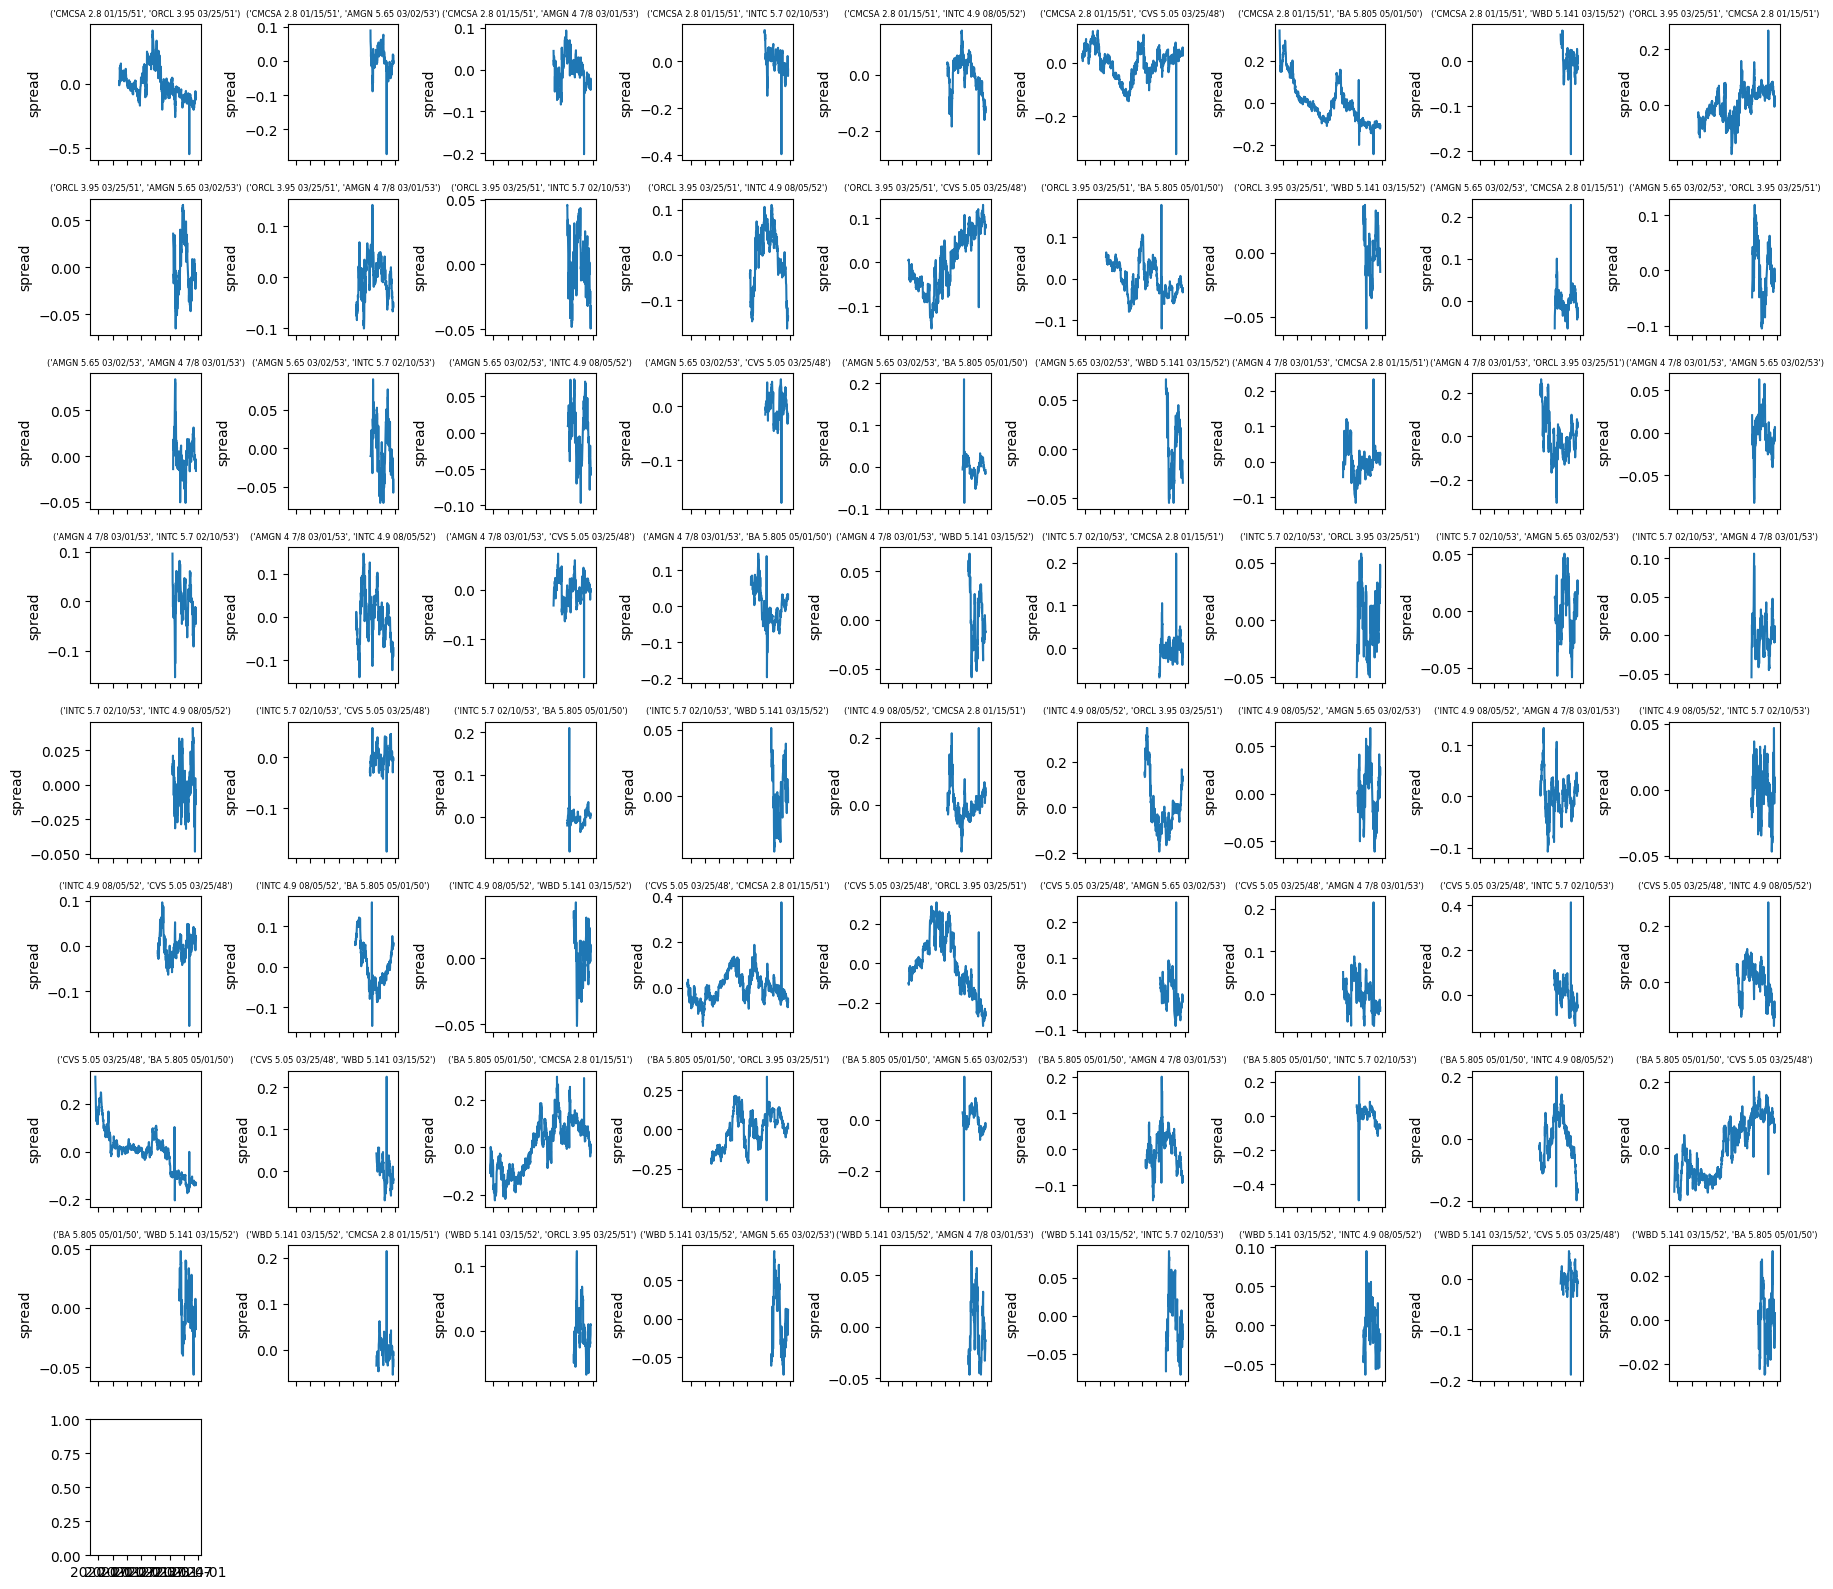

In [433]:
import statsmodels.api as sm
spread = {}

fig,axes = plt.subplots(nrows = 9, ncols = 9, figsize = (18,16),sharex = True)
axes = axes.ravel()
adf_valid = []
i = 0
for pair in permutations(tickers,2):

    pair_name = pair[0] +":"+ pair[1]
    index,spread[pair_name] = reg(norm_df[pair[0]], norm_df[pair[1]])

    axes[i].plot(index, spread[pair_name],label = pair)
    axes[i].set_title(pair,fontsize = 6)
    axes[i].set_ylabel('spread')
    i +=1
    adf = sm.tsa.stattools.adfuller(spread[pair_name] , maxlag=1)
    if (adf[0] < adf[4]['1%']) and (adf[1] < 0.05):
        adf_valid.append(pair_name)
        print(pair)

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In conclusion, from the stationary test, there are several pair with valid cointegration.


In [441]:
unique_pairs = set()

for string in adf_valid:
    left, right = string.split(':')
    if (right.strip(), left.strip()) not in unique_pairs:
        unique_pairs.add((left.strip(), right.strip()))
        print((left.strip(), right.strip()))


('CMCSA 2.8 01/15/51', 'AMGN 5.65 03/02/53')
('CMCSA 2.8 01/15/51', 'AMGN 4 7/8 03/01/53')
('CMCSA 2.8 01/15/51', 'INTC 5.7 02/10/53')
('CMCSA 2.8 01/15/51', 'CVS 5.05 03/25/48')
('CMCSA 2.8 01/15/51', 'WBD 5.141 03/15/52')
('ORCL 3.95 03/25/51', 'CMCSA 2.8 01/15/51')
('ORCL 3.95 03/25/51', 'INTC 5.7 02/10/53')
('AMGN 5.65 03/02/53', 'CVS 5.05 03/25/48')
('AMGN 5.65 03/02/53', 'BA 5.805 05/01/50')
('AMGN 4 7/8 03/01/53', 'CVS 5.05 03/25/48')
('INTC 5.7 02/10/53', 'INTC 4.9 08/05/52')
('INTC 5.7 02/10/53', 'CVS 5.05 03/25/48')
('INTC 5.7 02/10/53', 'BA 5.805 05/01/50')
('INTC 4.9 08/05/52', 'CVS 5.05 03/25/48')
('INTC 4.9 08/05/52', 'WBD 5.141 03/15/52')
('CVS 5.05 03/25/48', 'WBD 5.141 03/15/52')


### From above result, we can conclude the 'CMCSA 2.8 01/15/51' and 'INTC 5.7 02/10/53' has more influence among the bond pool

# Approach 2, using leading and lagging approach to find the largest r^2 between pairs

We shift the original time series $a$ with a window size $n$ to create a new time series $ a' $. This shifting operation allows us to align the time series with different starting points. We then compute the coefficient of determination ($ R^2 $) between the shifted time series $ a'$ and a goal time series $g$. The coefficient of determination measures the proportion of the variance in the goal time series that is predictable from the shifted time series. A higher $ R^2 $ value indicates a stronger linear relationship between the two time series.




### Formulation:

Let $ a = [a_1, a_2, \ldots, a_N] $ represent the original time series.

We define a shifted time series $a'$ with window size $n$ as follows:

$ a'_i = a_{i-n+1} $

for $ n \leq i \leq N $

Then, we calculate the coefficient of determination ($ R^2 $) between the shifted time series $ a' $ and the goal time series $ g$.


In the relationship between two time series ($y_t$ and $x_t$), the series $y_t$ may be related to past lags of the x-series. The sample cross correlation function (CCF) is helpful for identifying lags of the x-variable that might be useful predictors of $y_t$. I would like to use this method to find out the optimal lag between the bonds

## Cross-correlation for Continuous Functions

Cross-correlation for continuous functions $ f(t) $ and $ g(t) $ is defined as:

$ (f \star g)(\tau) = \int_{t_0}^{t_0+T} f^*(t) g(t + \tau) dt $

Where $ \tau $ is defined as the displacement, also known as the lag.

## Cross-correlation for Discrete Functions

Cross-correlation for discrete functions $ f[n] $ and $ g[n] $ is defined as:

$ (f \star g)[m] = \sum_{n=-\infty}^{\infty} f^*[n] g[n + m] $

Where $ m $ is the lag.


In [442]:
from scipy import signal

def reg_shift(x,y):

    #subtract the mean
    correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")

    #cross correlation
    lags = signal.correlation_lags(len(x), len(y), mode="full")

    #optimize the lag days
    lag = lags[np.argmax(abs(correlation))]

    return lag

In [443]:
cc_dict = {}


madf = pd.DataFrame()
for col in data.columns:

    # Calculate moving average
    ma_col = norm_df[col].rolling(window=14).mean()

    # Add moving average to the DataFrame
    madf[col] = ma_col

#
for pair in permutations(tickers,2):
    pair_name = pair[0] +":"+ pair[1]

    lag= reg_shift(norm_df[pair[0]], norm_df[pair[1]])
    #lag= reg_shift(madf[pair[0]], madf[pair[1]])

    cc_dict[pair_name] = lag

#generate lag summary dataframe
cc_df = pd.DataFrame.from_dict(cc_dict,orient='index',columns = ['lag'])

#sort
cc_df.sort_values(by = 'lag',inplace = True, ascending= False)

cc_df

,lag
CVS 5.05 03/25/48:CMCSA 2.8 01/15/51,-366
CVS 5.05 03/25/48:ORCL 3.95 03/25/51,-366
CVS 5.05 03/25/48:BA 5.805 05/01/50,-436
BA 5.805 05/01/50:CMCSA 2.8 01/15/51,-452
BA 5.805 05/01/50:ORCL 3.95 03/25/51,-452
...,...
INTC 5.7 02/10/53:ORCL 3.95 03/25/51,-888
INTC 5.7 02/10/53:AMGN 5.65 03/02/53,-888
INTC 5.7 02/10/53:AMGN 4 7/8 03/01/53,-888
INTC 5.7 02/10/53:CVS 5.05 03/25/48,-888


from the lag summarization, we can see the if lag is -888, which is the length of dataframe, there is not lead-lag relationship in the pair. Then we filter out the pair with no lead-lag relationship and further visualize the pair after shiftting the lag.

In [444]:
filter_cc = cc_df[cc_df['lag'] != -888]
print(len(filter_cc))
filter_cc


24


,lag
CVS 5.05 03/25/48:CMCSA 2.8 01/15/51,-366
CVS 5.05 03/25/48:ORCL 3.95 03/25/51,-366
CVS 5.05 03/25/48:BA 5.805 05/01/50,-436
BA 5.805 05/01/50:CMCSA 2.8 01/15/51,-452
BA 5.805 05/01/50:ORCL 3.95 03/25/51,-452
BA 5.805 05/01/50:CVS 5.05 03/25/48,-523
CMCSA 2.8 01/15/51:ORCL 3.95 03/25/51,-531
CMCSA 2.8 01/15/51:CVS 5.05 03/25/48,-531
CMCSA 2.8 01/15/51:BA 5.805 05/01/50,-531
CVS 5.05 03/25/48:AMGN 4 7/8 03/01/53,-662


/var/folders/9k/3t7xfs3d5nd30hq7p7gdpdkc0000gn/T/ipykernel_12141/3148582467.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  axes[ct].plot(norm_df[lag].index,norm_df[lag].shift(int(filter_cc.loc[i])),label = 'shift_' + lag)


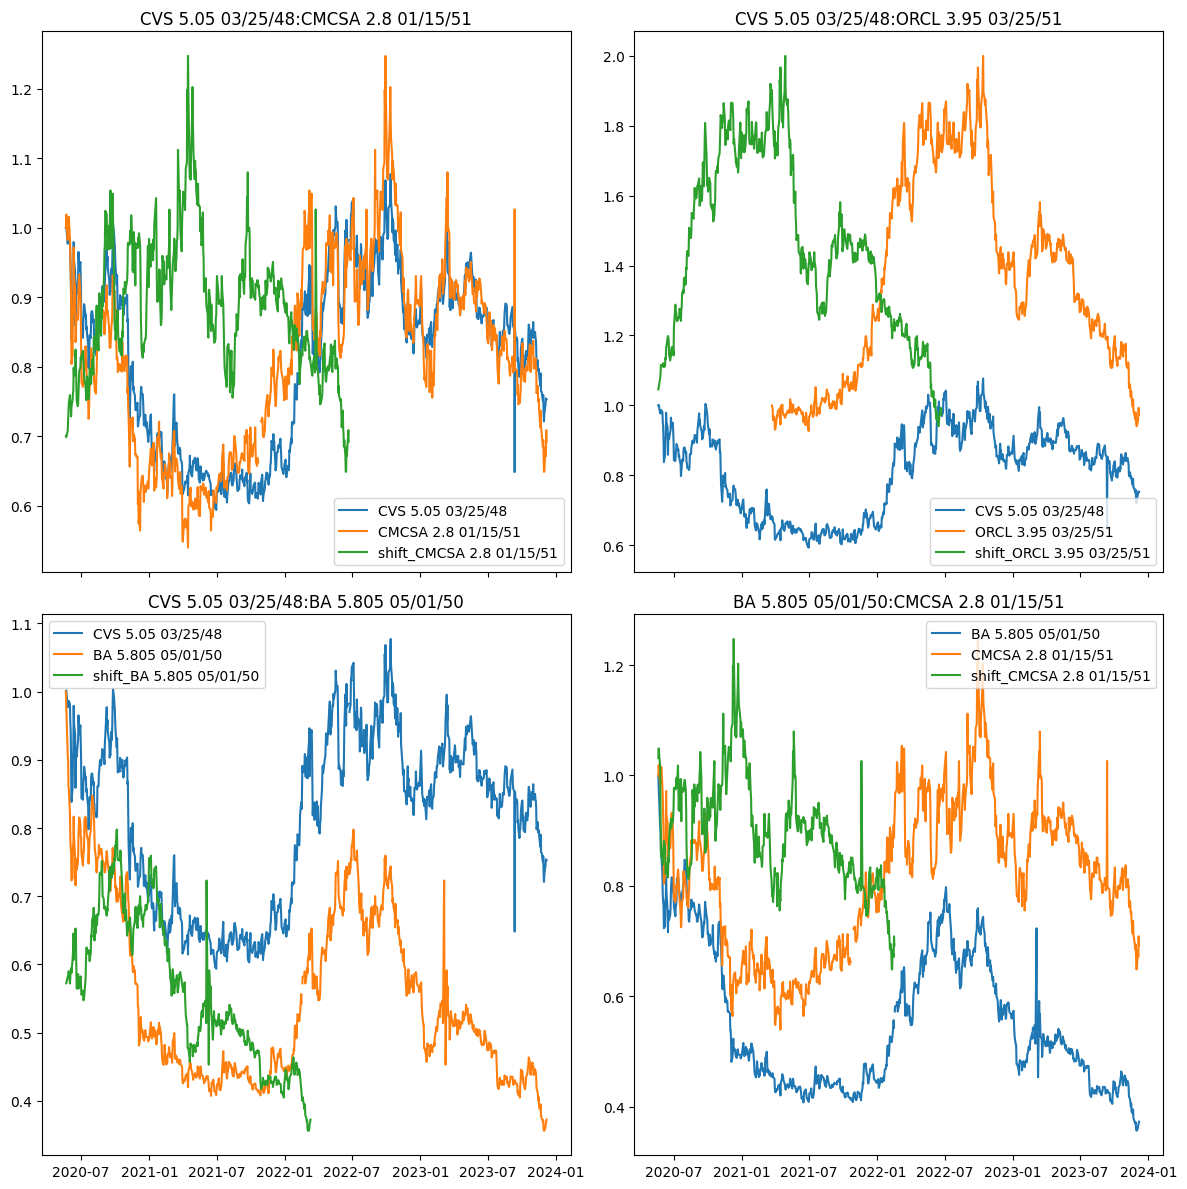

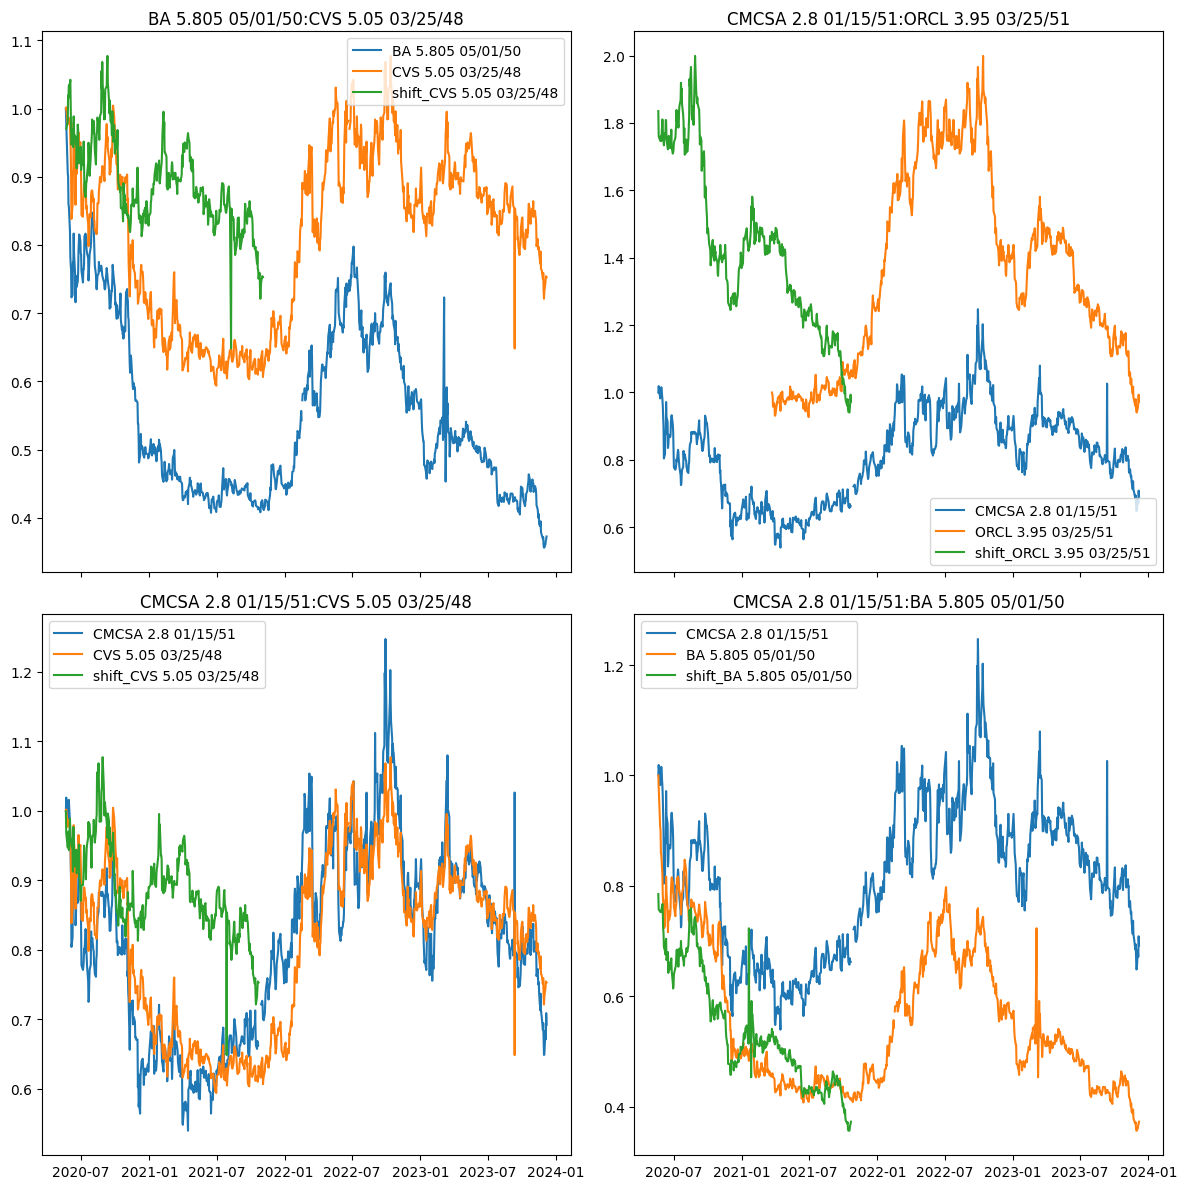

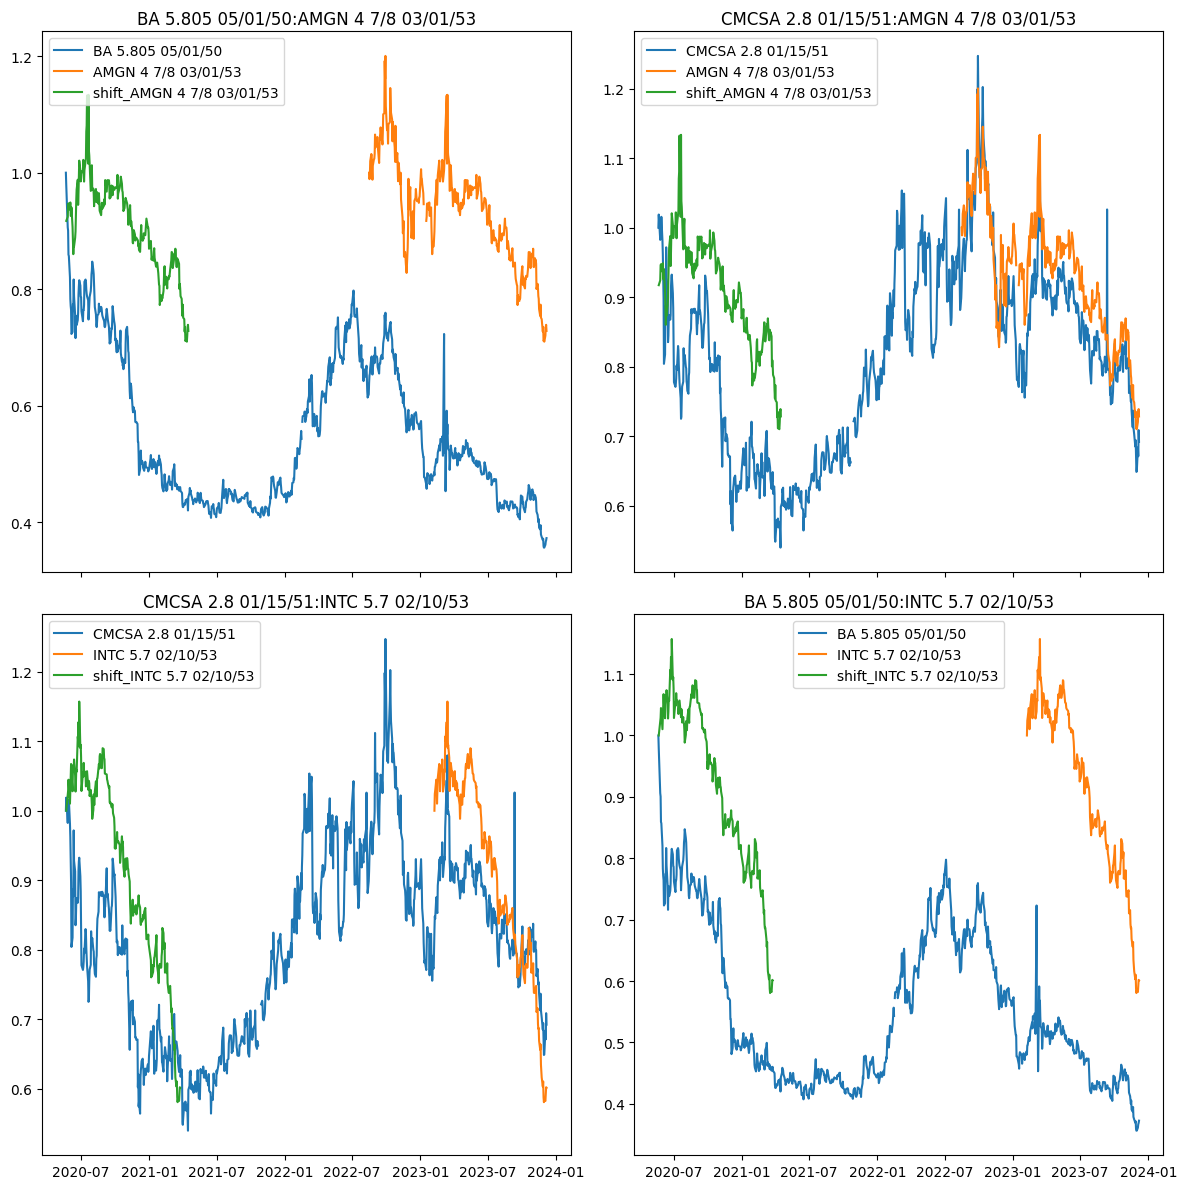

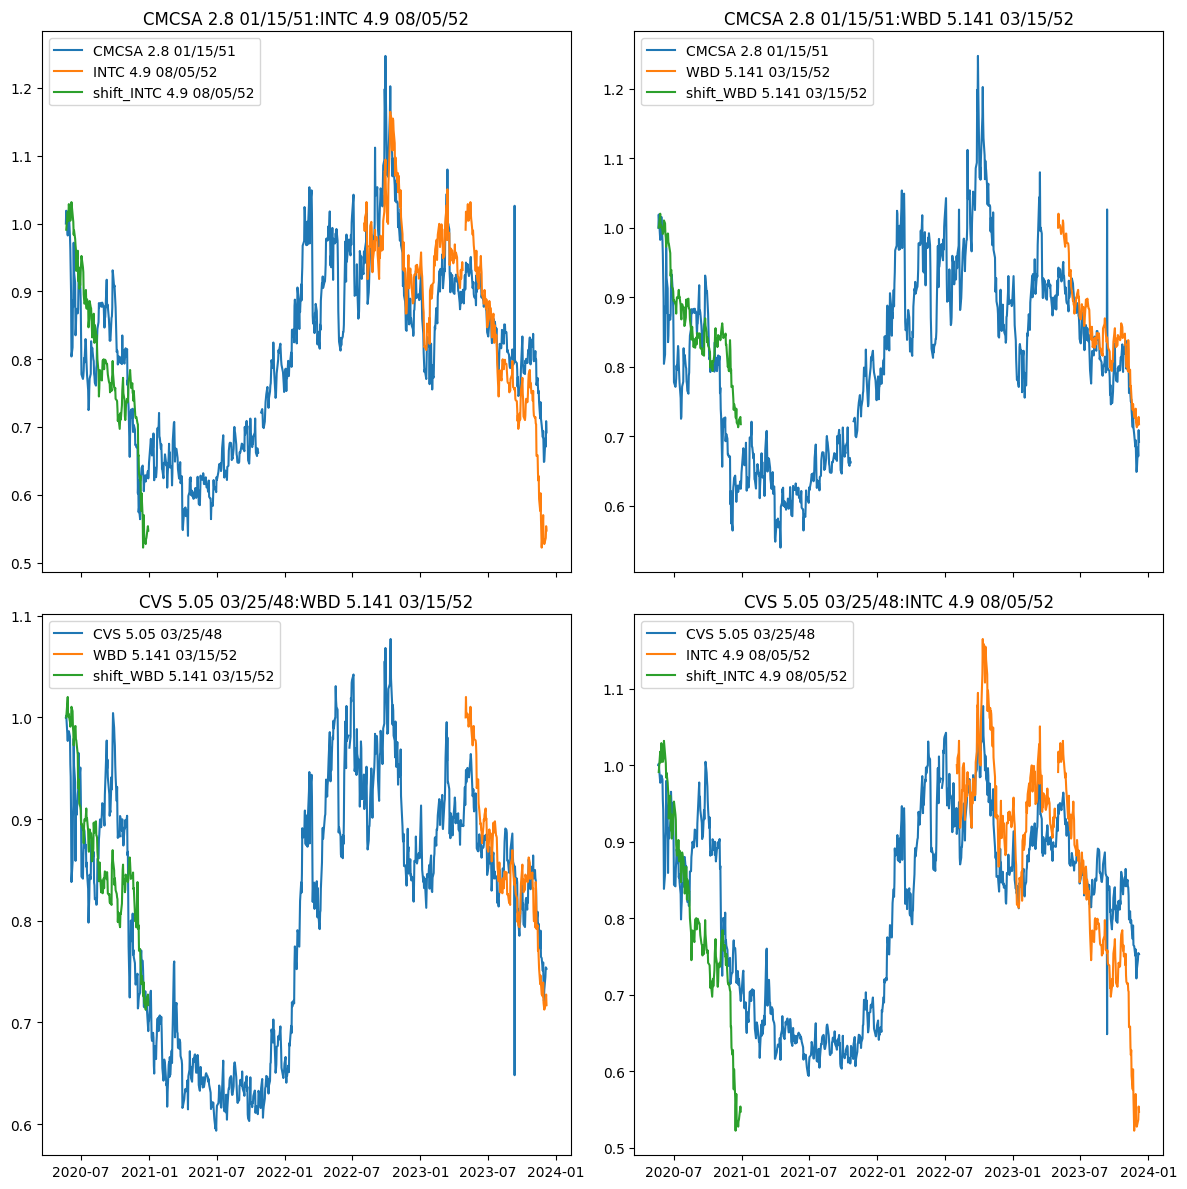

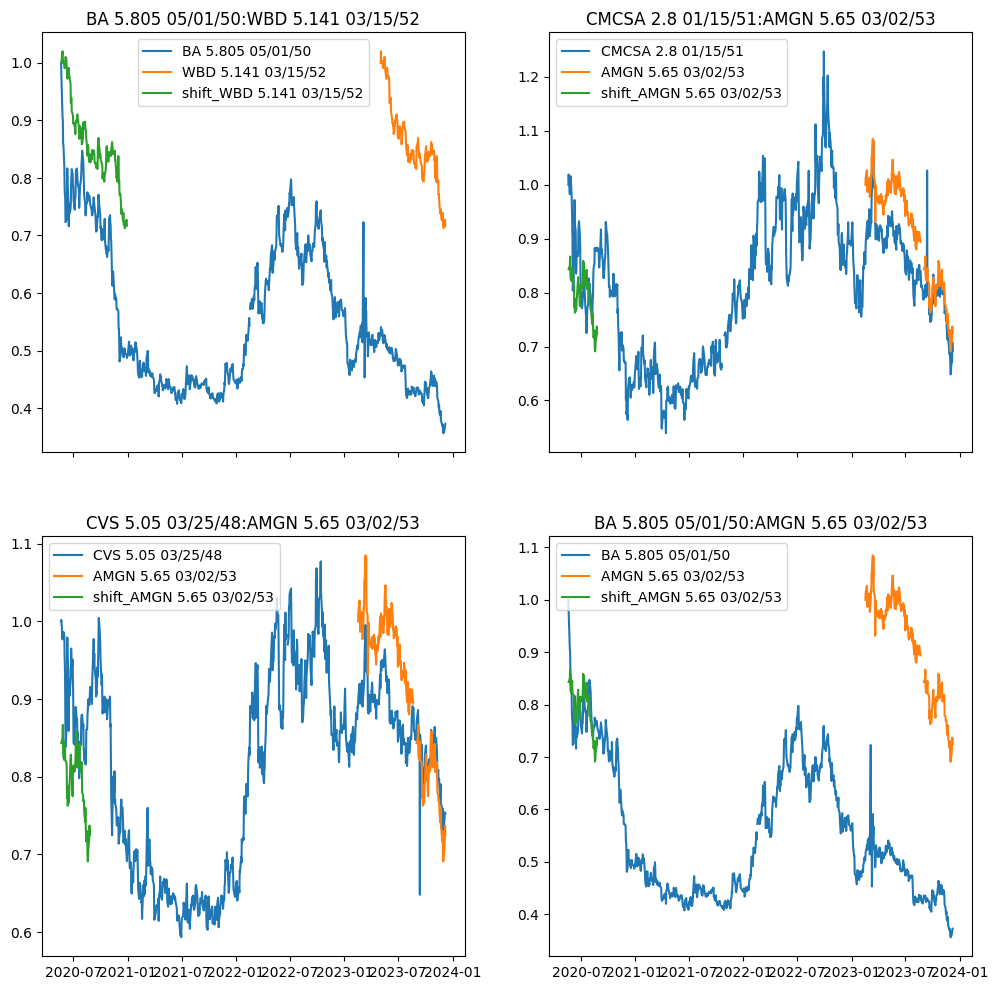

In [445]:
ct = 0
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12),sharex = True)
axes = axes.ravel()
for i in filter_cc.index:


    lead,lag = i.split(':')
    

    if ct != 4:
        axes[ct].plot(norm_df[lead].index,norm_df[lead],label = lead)
        axes[ct].plot(norm_df[lag].index,norm_df[lag],label = lag)
        axes[ct].plot(norm_df[lag].index,norm_df[lag].shift(int(filter_cc.loc[i])),label = 'shift_' + lag)
        axes[ct].set_title(i)
        axes[ct].legend()

        ct +=1
    else:
        plt.tight_layout()
        plt.show()
        fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12),sharex = True)
        axes = axes.ravel()
        ct=0

## Cross-validate the pair from approach 1 and approach 2

In [448]:
cv_pair = filter_cc.loc[filter_cc.index.intersection(set(adf_valid))]
cv_pair

,lag
CVS 5.05 03/25/48:CMCSA 2.8 01/15/51,-366
CMCSA 2.8 01/15/51:CVS 5.05 03/25/48,-531
CVS 5.05 03/25/48:AMGN 4 7/8 03/01/53,-662
CMCSA 2.8 01/15/51:AMGN 4 7/8 03/01/53,-662
CMCSA 2.8 01/15/51:INTC 5.7 02/10/53,-678
BA 5.805 05/01/50:INTC 5.7 02/10/53,-678
CVS 5.05 03/25/48:INTC 5.7 02/10/53,-678
CMCSA 2.8 01/15/51:WBD 5.141 03/15/52,-737
CVS 5.05 03/25/48:WBD 5.141 03/15/52,-737
CMCSA 2.8 01/15/51:AMGN 5.65 03/02/53,-821


**In conclusion, CVS 5.05 03/25/48 will affect CMCSA 2.8 01/15/51 after 366 days,

CMCSA 2.8 01/15/51 affect CVS 5.05 03/25/48	after 531 days,

CVS 5.05 03/25/48 will affect AMGN 4 7/8 03/01/53 after 662 days
CMCSA 2.8 01/15/51 will affect AMGN 4 7/8 03/01/53	-662 days

CMCSA 2.8 01/15/51 will affect INTC 5.7 02/10/53	-678 days

BA 5.805 05/01/50 will affect INTC 5.7 02/10/53	-678 days

CVS 5.05 03/25/48 will affect INTC 5.7 02/10/53	-678 days

CMCSA 2.8 01/15/51 will affect WBD 5.141 03/15/52	-737 days

CVS 5.05 03/25/48 will affect WBD 5.141 03/15/52	-737 days

CMCSA 2.8 01/15/51 will affect AMGN 5.65 03/02/53	-821 days

CVS 5.05 03/25/48 will affect AMGN 5.65 03/02/53	-821 days

BA 5.805 05/01/50 will affect AMGN 5.65 03/02/53	-821**

# Market Beta Analysis

In this part, my intuition is to define the market ETF movement by taking the average return in the bond pool. Then using linear regression to calculate each bond's beta, alpha and rsquared


## Market Beta

$ R_i = \alpha_i + \beta_i R_m + \varepsilon_i $

where:
- $ R_i $ is the return of the investment,
- $ R_m $ is the return of the market (usually represented by a market index),
- $ \alpha_i $ is the alpha or intercept term,
- $ \beta_i $ is the beta coefficient, and
- $ \varepsilon_i $ is the error term.


## Generating Market Index by Averaging Returns

$ R_{\text{index}} = \frac{1}{N} \sum_{i=1}^{N} R_i $

where:
- $ R_{\text{index}} $ is the return of the market index,
- $ R_i $ is the return of each constituent asset, and
- $ N $ is the total number of constituent assets in the market.


In [469]:
#Market Index
market_etf = data.pct_change().mean(axis = 1)
regression_res = {}

for i in tickers:

    #prepare the data - drop rows with any nan values
    regression_data = pd.DataFrame({'y' : daily_pct[i],'x':market_etf}).dropna()\
    
    #define the predictor x and target y
    x = regression_data['x'].values.reshape(-1,1)
    y = regression_data['y'].values

    model = linear_model.LinearRegression()

    #fit the model
    model.fit(x,y)

    #predict
    y_pred = model.predict(x)

    #predict
    regression_res[i] = {'alpha' : model.intercept_,
                         'beta' : model.coef_[0],
                         'r2': model.score(x,y)}

regression_res_df = pd.DataFrame.from_dict(regression_res,orient = 'index').sort_values(by = ['beta','r2'],ascending = False)
regression_res_df


/var/folders/9k/3t7xfs3d5nd30hq7p7gdpdkc0000gn/T/ipykernel_12141/2943683108.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_etf = data.pct_change().mean(axis = 1)


,alpha,beta,r2
CMCSA 2.8 01/15/51,0.000504,1.241889,0.687926
AMGN 4 7/8 03/01/53,0.000308,1.034280,0.716540
INTC 4.9 08/05/52,-0.000453,1.031438,0.676446
BA 5.805 05/01/50,-0.000343,0.998166,0.497776
CVS 5.05 03/25/48,0.000321,0.916525,0.566437
INTC 5.7 02/10/53,-0.001327,0.880078,0.720945
AMGN 5.65 03/02/53,-0.000262,0.876711,0.648412
ORCL 3.95 03/25/51,-0.000038,0.822212,0.749771
WBD 5.141 03/15/52,-0.000467,0.741901,0.566996


Based on the linear regression analysis, CMCSA 2.8 01/15/51 has highest beta with 1.24(with 0.688 r^2 and also highest alpha), AMGN 4 7/8 03/01/53 has the second largest beta(with 0.716540 beta) and INTC 4.9 08/05/52 has beta with 1.031(with 0.676 r^2). CMCSA has highest beta also aligh with previous pair exploration that it has most lag components.